In [343]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from statsforecast import StatsForecast

from statsforecast.models import (
    Naive,
    SeasonalNaive,
    RandomWalkWithDrift
)

from warnings import filterwarnings

filterwarnings("ignore")

### 1.0. Produce Forecasts with Methods

#### 1.1. Aus Population (global economy)

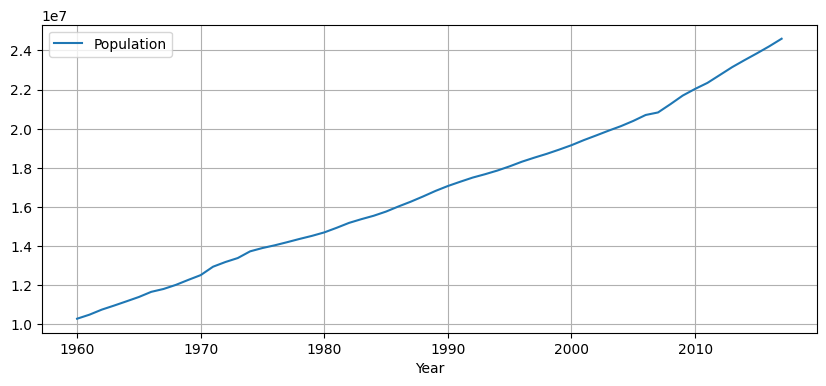

In [17]:
df = pd.read_csv("../data/global_economy.csv", index_col=[0])

df = df[df.Code == "AUS"].reset_index(drop=3)

df.plot(x="Year", y="Population", grid=2, figsize=(10,4));

In [143]:
h = 5

dff = df[["Year", "Population"]].copy()

next_years = [i for i in range(df.Year.max() + 1, df.Year.max() + h + 1)]

for year in next_years:
    mx = dff.loc[dff["Year"] == dff["Year"].max(), "Population"].values[0]
    mi = dff.loc[dff["Year"] == dff["Year"].min(), "Population"].values[0]
    yt = mx + (h / (len(dff) - 1)) * (mx - mi)

    dff = pd.concat([dff, pd.DataFrame({"Year": year, "Population": yt}, index=[0])], axis=0)

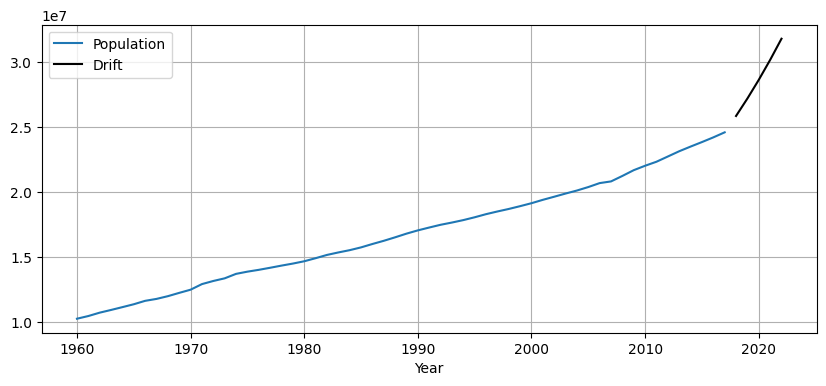

In [147]:
ax = df.plot(x="Year", y="Population", grid=2, figsize=(10,4))
dff[dff.Year >= next_years[0]].plot(x="Year", y="Population", label="Drift", color="k", ax=ax, grid=2);

#### 1.2. Aus Bricks (aus production)

In [196]:
df = pd.read_csv("../data/aus_production.csv", index_col=[0])
df['Quarter'] = df.Quarter.apply(lambda x: x.replace(' ', '-'))
df['Quarter'] = pd.PeriodIndex(df.Quarter, freq='Q').to_timestamp()

df.dropna(inplace=True)

forecast = pd.DataFrame(
        pd.date_range(
            start=df.Quarter.max() - pd.offsets.DateOffset(days=1),
            end=df.Quarter.max() + pd.offsets.DateOffset(years=3),
            freq="Q-DEC"
    )
)[:-1]

forecast.columns = ["Quarter"]

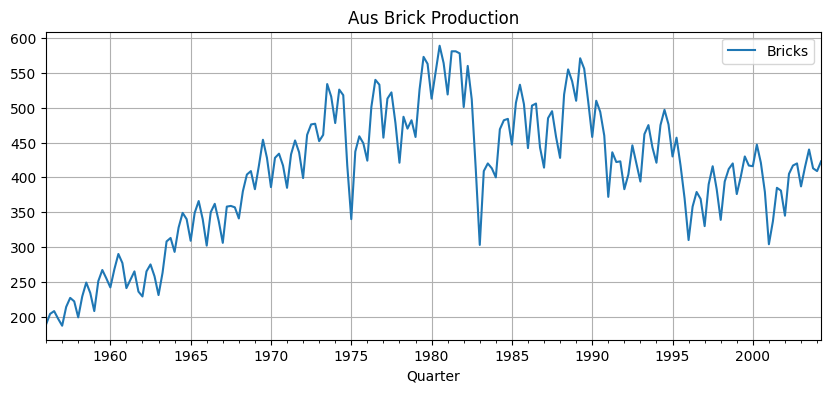

In [197]:
df.plot(
    x="Quarter", y="Bricks",
    grid=2, figsize=(10, 4),
    title="Aus Brick Production"
);

In [217]:
# Seasonal Naive
# To usando o ciclo completo do ulktimo quarter em vez dos dois ultimos faltantes
yts = df.tail(6).iloc[:-2, :]["Bricks"].values

# Naive
yt = df.iloc[-1]["Bricks"]

forecast["SNaive"] = yts.tolist() * len(forecast.Quarter.dt.year.unique())
forecast["Naive"] = [yt] * len(forecast)

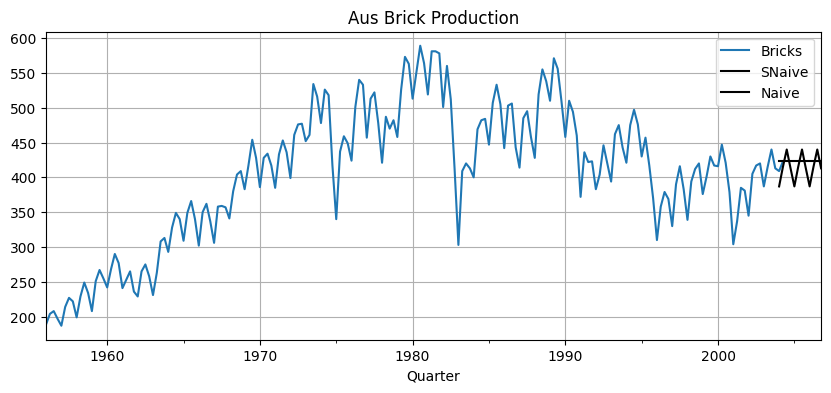

In [218]:
ax = df.plot(
    x="Quarter", y="Bricks",
    figsize=(10, 4),
    title="Aus Brick Production"
)
forecast.plot(
    x="Quarter", ax=ax,
    grid=2, color="k"
);

#### 1.3. NSW Lambs (aus livestock)

In [237]:
df = pd.read_csv("../data/aus_livestock.csv", index_col=[0])

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[(df.State == "New South Wales") & (df.Animal == "Lambs")].reset_index(drop=True)

df = df[df["Month"] >= "2000-01-01"].reset_index(drop=True)

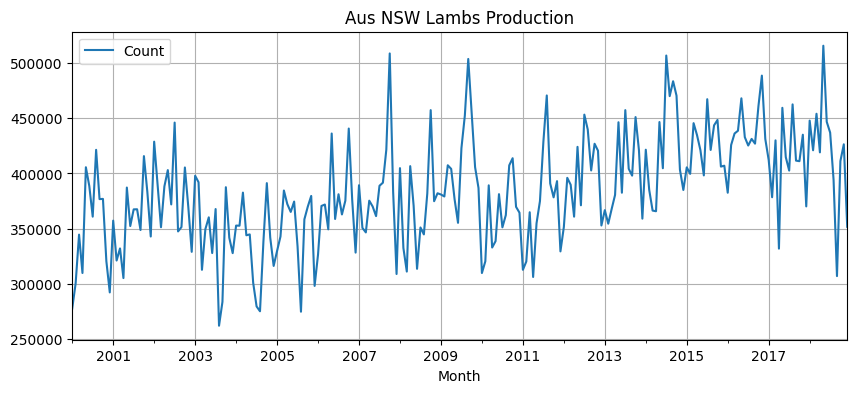

In [275]:
df.plot(
    x="Month", y="Count",
    grid=2, figsize=(10, 4),
    title="Aus NSW Lambs Production"
);

In [272]:
forecast = pd.DataFrame(
        pd.date_range(
            start=df.Month.max(),
            end=df.Month.max() + pd.offsets.DateOffset(years=2),
            freq="M"
    )
)[1:]

forecast.columns = ["Month"]

In [273]:
yt = df.loc[df.Month == df.Month.max(), "Count"].tolist()
syt = df.loc[df.Month.dt.year == df.Month.max().year, "Count"].tolist()

forecast["SNaive"] = (syt * 2)[:-1]
forecast["Naive"] = yt * len(forecast)

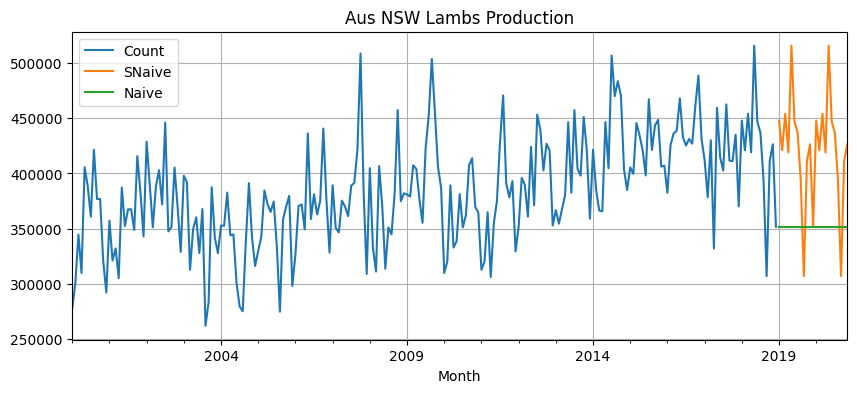

In [278]:
ax = df.plot(
    x="Month", y="Count",
    figsize=(10, 4),
    title="Aus NSW Lambs Production"
)
forecast.plot(
    x="Month", ax=ax, grid=2
);

#### 1.4. Household wealth (hh budget)

In [279]:
# Dataset indisponível

#### 1.5. Australian takeaway food turnover (aus retail)

In [290]:
df = pd.read_csv("../data/aus_retail.csv", index_col=[0])

df = df[df["Industry"] == "Takeaway food services"].reset_index(drop=True)

df["Month"] = pd.to_datetime(df["Month"], format="%Y %b")

df = df[["State", "Month", "Turnover"]]

In [291]:
df.State.value_counts()

State
Australian Capital Territory    441
New South Wales                 441
Queensland                      441
South Australia                 441
Tasmania                        441
Victoria                        441
Western Australia               441
Northern Territory              369
Name: count, dtype: int64

In [295]:
df.columns = ["unique_id", "ds", "y"]

In [305]:
sf = StatsForecast(
    models=[
        Naive(),
        SeasonalNaive(season_length=12),
        RandomWalkWithDrift()
    ],
    freq="M"
)

sf = sf.fit(df)

forecast = sf.forecast(h=12 * 2).reset_index()
forecast.columns = ["State", "Month", "Naive", "SNaive", "RWD"]

df.columns = ["State", "Month", "Turnover"]

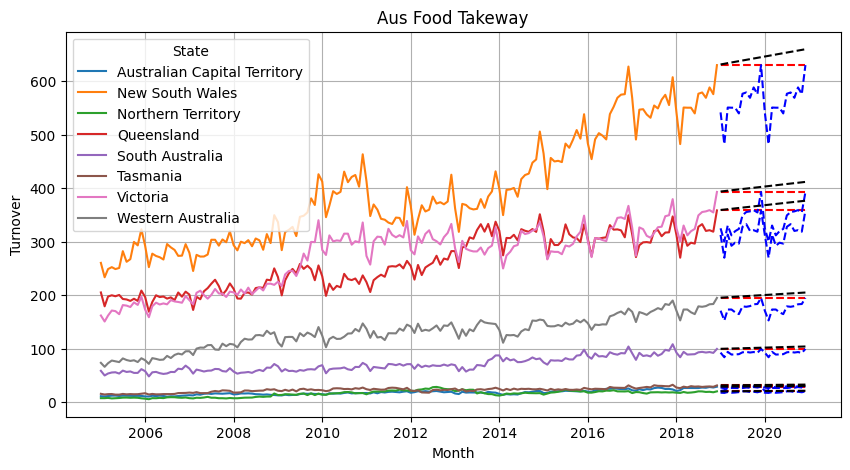

In [344]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(df[df["Month"] >= "2005-01-01"], x="Month", y="Turnover", hue="State", ax=ax)
sns.lineplot(forecast, x="Month", y="Naive", linestyle="--", palette=sns.color_palette(["red"]), hue="State", ax=ax, legend=False)
sns.lineplot(forecast, x="Month", y="SNaive", linestyle="--", palette=sns.color_palette(["blue"]), hue="State", ax=ax, legend=False)
sns.lineplot(forecast, x="Month", y="RWD", linestyle="--", palette=sns.color_palette(["k"]), hue="State", ax=ax, legend=False)

ax.set_title("Aus Food Takeway")
ax.grid(2)

### 2.0. Facebook stock price (data set gafa_stock)

### 3.0. Apply a seasonal naïve method to the quarterly Australian beer production

### 4.0. Repeat the previous exercise using the Australian Exports series from global_economy.

### 5.0. Produce forecasts for the 7 Victorian series in aus_livestock using SNAIVE().

### 6.0. Are the following statements true or false? Explain your answer.

### 7.0. For your retail time series (from Exercise 7 in Section 2.10):

### 8.0. Consider the number of pigs slaughtered in New South Wales (data set aus_livestock).

### 9.0. Create a training set for household wealth (hh_budget) by withholding the last four years as a test set.

### 10.0. Create a training set for Australian takeaway food turnover (aus_retail) by withholding the last four years as a test set.

### 11.0. We will use the Bricks data from aus_production (Australian quarterly clay brick production 1956–2005) for this exercise.

### 12.0. tourism contains quarterly visitor nights (in thousands) from 1998 to 2017 for 76 regions of Australia.